In [1]:
import json
import os
import matplotlib.pyplot as plt
import numpy as np

# Intra Subject

In [99]:
#def LoadResults(model):
model = "EffNet"
respath = "res_"+model
allfiles = os.listdir(respath)
datfiles = [file for file in allfiles if file[-4:]=="json"]
gc3dat = [file for file in datfiles if file.__contains__("GC3")]
rgbdat = [file for file in datfiles if file.__contains__("RGB")]
gc3paths = [os.path.join(respath,file) for file in gc3dat]
rgbpaths = [os.path.join(respath,file) for file in rgbdat]

for i in range(len(gc3dat)):
    with open(gc3paths[i]) as f:
        gc3dat[i] = json.load(f)
for i in range(len(rgbdat)):
    with open(rgbpaths[i]) as f:
        rgbdat[i] = json.load(f)

# Results loaded

In [100]:
def plotRes(indata, suptitle):
    fig, ax = plt.subplots(1,2,figsize=(12,5))
    colors = ["r", "g", "b"]
    lab = {"PT_"+model+"_Freeze": "Fine Tune",
            "PT_"+model+"_Tune": "Full Tune",
            "UT_"+model+"_Tune": "Full Train"
            }
    # plot
    for index in range(3):
        title = list(indata[index].keys())[0]
        data = indata[index][title]
        n = len(data["loss"]["train"])
        for phase in ["train","val"]:
            style = None
            if phase == "train":
                style = "dotted"
            ax[0].plot(range(n),data["loss"][phase], label=lab[title]+" "+phase.capitalize(), color=colors[index], linestyle = style)
            ax[0].set_ylabel("Loss")
            ax[0].set_xlabel("Epochs")
            #ax[0].legend()
            ax[1].plot(range(n),data["acc"][phase], label=lab[title]+" "+phase.capitalize(), color=colors[index], linestyle = style)
            ax[1].set_ylabel("Accuracy [%]")
            ax[1].set_xlabel("Epochs")
            ax[1].legend(bbox_to_anchor=(1, 0.7))

            if phase == "val":
                print("Max "+lab[title]+" val acc", np.max(data["acc"][phase]))
                print("Mean "+lab[title]+" val acc", np.mean(data["acc"][phase]))
    fig.suptitle(suptitle)


Max Fine Tune val acc 0.6166666666666667
Mean Fine Tune val acc 0.5533333333333333
Max Full Tune val acc 0.5833333333333334
Mean Full Tune val acc 0.45283333333333337
Max Full Train val acc 0.5666666666666667
Mean Full Train val acc 0.5198333333333331


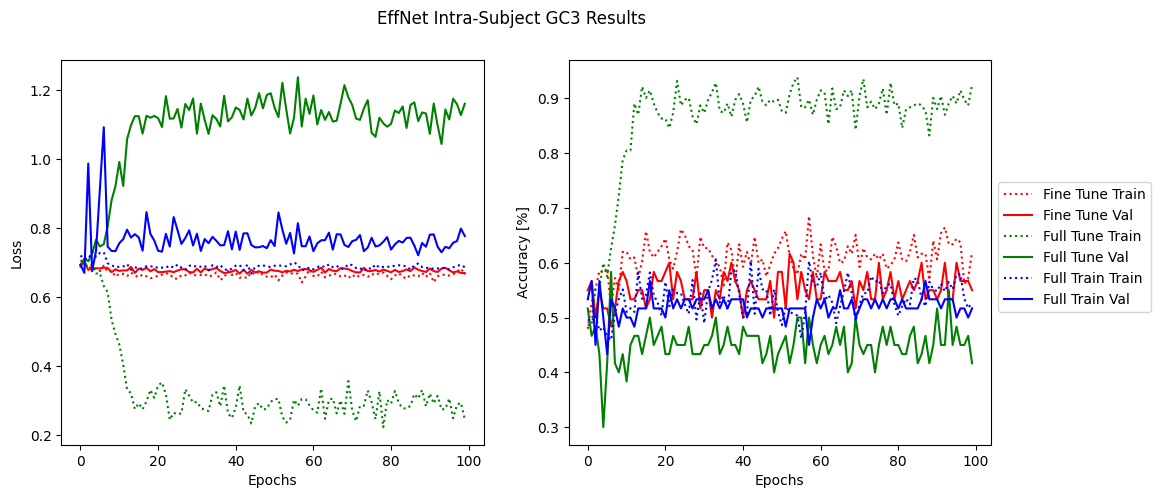

In [101]:
plotRes(gc3dat, suptitle=model + " Intra-Subject GC3 Results")

Max Fine Tune val acc 0.6166666666666667
Mean Fine Tune val acc 0.5576666666666666
Max Full Tune val acc 0.65
Mean Full Tune val acc 0.5664999999999999
Max Full Train val acc 0.6
Mean Full Train val acc 0.5071666666666667


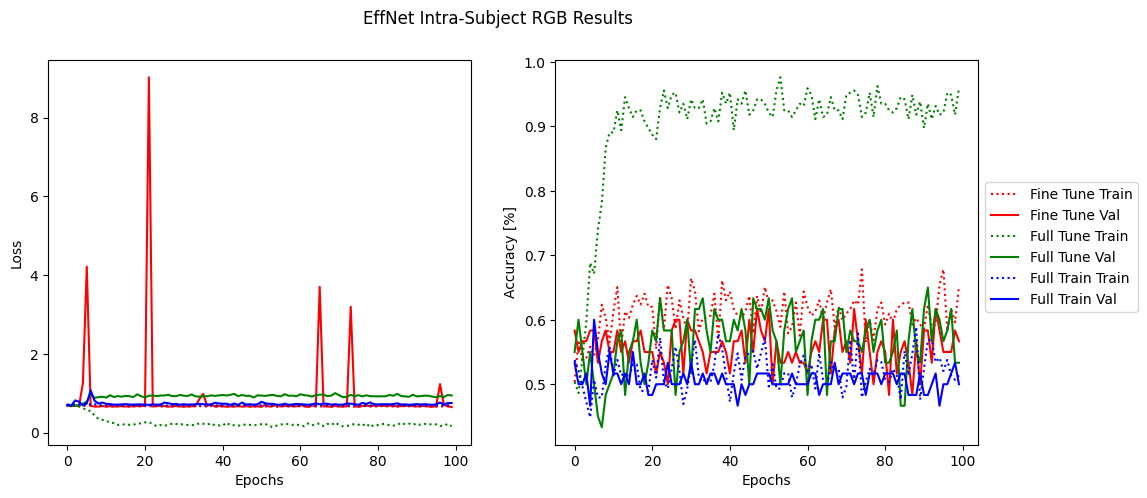

In [102]:
plotRes(rgbdat, suptitle=model+" Intra-Subject RGB Results")

# Inter Subject

In [20]:
#def LoadResults(model):
model = "ResNet"
respath = "res_"+model
allfiles = os.listdir(respath)
datfiles = [file for file in allfiles if file[-4:]=="json"]
gc3dat = [file for file in datfiles if file.__contains__("GC3")]
rgbdat = [file for file in datfiles if file.__contains__("RGB")]
gc3paths = [os.path.join(respath,file) for file in gc3dat]
rgbpaths = [os.path.join(respath,file) for file in rgbdat]

for i in range(len(gc3dat)):
    with open(gc3paths[i]) as f:
        gc3dat[i] = json.load(f)
for i in range(len(rgbdat)):
    with open(rgbpaths[i]) as f:
        rgbdat[i] = json.load(f)

# Results loaded

In [21]:
def plotRes(indata, suptitle, color):
    fig, ax = plt.subplots(1,2,figsize=(12,5))
    colors = ["r", "g", "b"]
    lab = {color+"_Tune_Block": "Tune Block",
            color+"_Tune_FC": "Tune FC",
            color+"_Tune_Full": "Tune Full"
            }
    # plot
    for index in range(3):
        title = list(indata[index].keys())[0]
        data = indata[index][title]
        n = len(data["loss"]["train"])
        for phase in ["train","val"]:
            style = None
            if phase == "train":
                style = "dotted"
            ax[0].plot(range(n),data["loss"][phase], label=lab[title]+" "+phase.capitalize(), color=colors[index], linestyle = style)
            ax[0].set_ylabel("Loss")
            ax[0].set_xlabel("Epochs")
            #ax[0].legend()
            ax[1].plot(range(n),data["acc"][phase], label=lab[title]+" "+phase.capitalize(), color=colors[index], linestyle = style)
            ax[1].set_ylabel("Accuracy [%]")
            ax[1].set_xlabel("Epochs")
            ax[1].legend(bbox_to_anchor=(1, 0.7))

            if phase == "val":
                print("Max "+lab[title]+" val acc", np.max(data["acc"][phase]))
                print("Mean "+lab[title]+" val acc", np.mean(data["acc"][phase]))
    fig.suptitle(suptitle)


Max Tune Block val acc 0.5426136363636364
Mean Tune Block val acc 0.5164204545454545
Max Tune FC val acc 0.5397727272727273
Mean Tune FC val acc 0.5003409090909091
Max Tune Full val acc 0.4943181818181818
Mean Tune Full val acc 0.45772727272727265


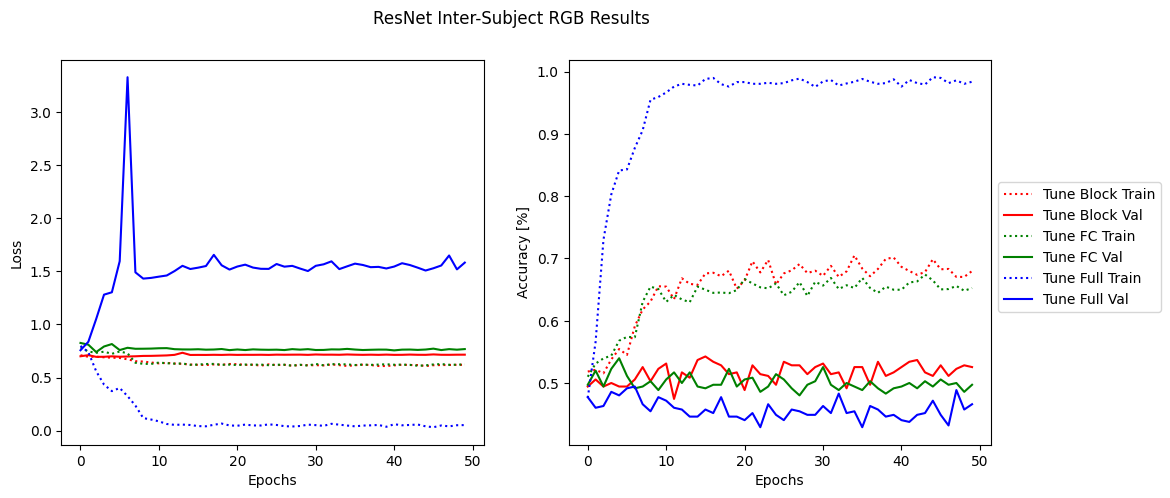

In [22]:
plotRes(rgbdat, suptitle=model+" Inter-Subject RGB Results", color="RGB")

Max Tune Block val acc 0.5397727272727273
Mean Tune Block val acc 0.5156818181818182
Max Tune FC val acc 0.5284090909090909
Mean Tune FC val acc 0.4986931818181819
Max Tune Full val acc 0.5170454545454546
Mean Tune Full val acc 0.48625


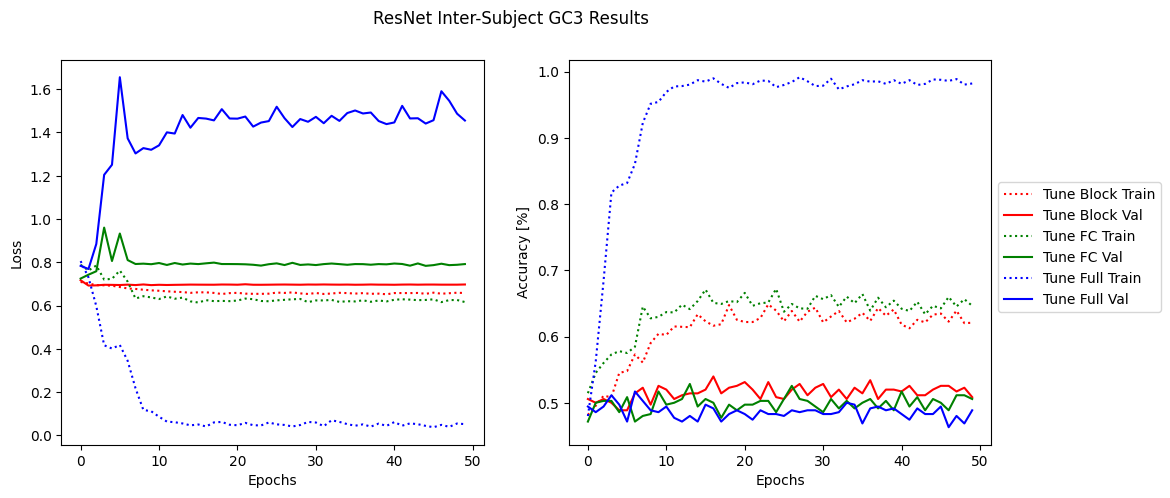

In [23]:
plotRes(gc3dat, suptitle=model+" Inter-Subject GC3 Results", color="GC3")